#### Project Type: Exploratory Data Analysis
### Project Number: 0009
## Project Title: FinCEN Suspicious Activity Reports
---


# **STAGE 1. PROBLEM DEFINITION**
    




### Data source

---

- Large Bitcoin blockchain transactions:  https://inca.digital/files/Bitcoin-large-transactions-2015_2016_2017.zip
- FinCEN SAR dataset:  https://www.icij.org/investigations/fincen-files/download-fincen-files-transaction-data/


### Project Objectives

---

Описание тестового задания: https://inca.digital/careers/?form=data-analyst-challenge

Задачи:  
- Match suspicious bank transactions to blockchain transaction hashes

### Success criteria

---

- Таблица в которой сопаставленны подозрительные банковские операции с хэшами блокчейн-транзакций

### Termenology

---

Источнки информации: 
- https://vc.ru/legal/154061-kakie-operacii-kompaniy-i-fizicheskih-lic-kontroliruyut-banki
- https://brobank.ru/somnitelnye-operacii/
- https://www.imolin.org/doc/amlid/Indonesia_Guidelines2_STR_FSP.pdf
- http://fiubelize.org/types-of-suspicious-activities-or-transactions/
- https://www.fintrac-canafe.gc.ca/guidance-directives/transaction-operation/Guide2/2-eng




### Task type

---

Задачи: 
- Разведочный анализ данных

    
# **STAGE 2. PRELIMINARY DATA WRANGLING**



### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
# Путь к данным
data_path = r'D:/Data_Science_Project/2. Exploratory Data Analysis/[0009] Project 2 - Search for suspicious transactions'

## SECTION 2.1.  DATA UNDERSTANDING

### _Collect initial data_

---

### Bitcoin large transactions

Введем переменную __blt_2015__ = bitcoin large transactions за соответсвующий год 

#### 2015 год

In [3]:
# Загрузка исходных данных по транзанкциям за 2015 
blt_2015 = pd.read_csv(data_path + '/Bitcoin-large-transactions-2015_2016_2017/2015.csv')

# Предварительная оценка результата 
blt_2015.head()

,time,Hash,Sender,Receiver,Transaction_amount_BTC,Price,Transaction_amount_USD
0,2015-03-31,16f27194b06bcf1f61b1531a2a861fdcd027a232428090...,1BtNH4rtj3PVe6PWYsziQMnXofZmoPmGHu,1PrGFmmFFeD6v9ihS74ewjAzSMmQxsQAuw,5272.999900,245.902782,1.296645e+06
1,2015-03-31,68a4c74ebb211c5c61caa0296d9eae5b0336e0c7b7c68a...,1NE3QFkf4aFUgCNTvGjiZsY59yDsGratiU\n1Bst4GwKrN...,18zXyBVHCU3hu3ivszZNh3NqA1eA1jVBsm,4509.877141,245.902782,1.108991e+06
2,2015-03-31,ddf989c7797164150de0764e364f7e01b7253538de753f...,15HgmxddgExHKTfkXwacQgKf9nx8PZEDri,1EdyFyyzgxWsV3P1x41vKDrEeDDyz9QAMe,4138.094249,245.902782,1.017569e+06
3,2015-03-31,1866b030f8a3a6f83393fa23215759c05d13a2bf30d716...,18uvUoZuDFXaPjKBDHu8w2PNYqY6dXDs8G,1HoiNQf18RwzeLhBmcGM8Pqqyqc9KCSiYE,4458.364297,245.902782,1.096324e+06
4,2015-03-31,1866b030f8a3a6f83393fa23215759c05d13a2bf30d716...,18uvUoZuDFXaPjKBDHu8w2PNYqY6dXDs8G,14LPd6dcAZpJD3jfz8FPJcgdL8G1hMWZTq,8000.000000,245.902782,1.967222e+06


#### 2016 год

In [4]:
# Загрузка исходных данных по транзанкциям за 2016 
blt_2016 = pd.read_csv(data_path + '/Bitcoin-large-transactions-2015_2016_2017/2016.csv')

# Предварительная оценка результата 
blt_2016.head()

,time,Hash,Sender,Receiver,Transaction_amount_BTC,Price,Transaction_amount_USD
0,2016-04-01,2a024be6047fd7875cc135a23432da8a47ae66652d9171...,1A4x26mbtYHJ7YHW9Sy5w8v5AvQE2oBmKo,1FRdy9kq2BmKg4GCDqWsBfC7KxXBphUVez,5733.810145,415.703924,2.383567e+06
1,2016-04-01,c9214e4c9776be449697c09517bcc152ea3af6c218010a...,1wiYByyCBbNo52s4py89Rxp8b2AwDLX6n,1A4x26mbtYHJ7YHW9Sy5w8v5AvQE2oBmKo,6698.999845,415.703924,2.784801e+06
2,2016-04-01,1dd365a81a9c7b2f7ceb8407a127f95e916e6432952b1a...,17irB8xLxhVRerCoUyypnmpoak3QBpVp2z,3Jar2U9ZMwHr2eYDQP56tpczXG5W6jQtQ1,3000.000000,415.703924,1.247112e+06
3,2016-04-01,825d31c7a9dfbfba0200fb1e844418941e6fb0dc7306c5...,3P3LXtymthf9Z38CqTsBPu8FYDzE6xDhn4\n3MyCd2bbU9...,3JSFA7MzqdZkWe8aouPqKYh5erpg5xKGgY,4000.000000,415.703924,1.662816e+06
4,2016-04-01,825d31c7a9dfbfba0200fb1e844418941e6fb0dc7306c5...,3P3LXtymthf9Z38CqTsBPu8FYDzE6xDhn4\n3MyCd2bbU9...,34CEB12rZ24enWqcqw2SBKcKdcVPnCvXLA,7000.000000,415.703924,2.909927e+06


#### 2017 год

In [5]:
# Загрузка исходных данных по транзанкциям за 2017 
blt_2017 = pd.read_csv(data_path + '/Bitcoin-large-transactions-2015_2016_2017/2017.csv')

# Предварительная оценка результата 
blt_2017.head()

,time,Hash,Sender,Receiver,Transaction_amount_BTC,Price,Transaction_amount_USD
0,2017-05-01,e9a9f4b62d7f716eda4ebb46e9631f17b10e9849ded533...,36BFtUyTe7AyTyH8VMaGe3e9EixH1VeLQ6\n3KBvXWpn2y...,3Pm3KWxdW7yE8To7s3TgizgqPwkWG4CANk,1480.327135,1372.148194,2.031228e+06
1,2017-05-01,70d5a9354623cd31f44f4b36ad5706f42ba6bb5c3398ce...,12cgpFdJViXbwHbhrA3TuW1EGnL25Zqc3P,17A16QmavnUfCW11DAApiJxp7ARnxN5pGX,3604.226297,1372.148194,4.945533e+06
2,2017-05-01,bff73d5418a813dc5c17ea11237000520a55b8beef8319...,31mrqtk7rneZdos7L2QDPh9czwQWB6L3tA,3HXG1S1DCeMsynttXyoy62iF6mibvmPRcZ,1536.760275,1372.148194,2.108663e+06
3,2017-05-01,6dea9ed31af9e7c5ad6b3a68fc16ec6fa7403701d1f50e...,1PqeMdCUq8rd7yywbkhoW8oKQZSUEyoddF\n1ZTG4qqz7B...,13odri1aZgf8r3gymdAxmkANaE1gRQU3HE,5521.000000,1372.148194,7.575630e+06
4,2017-05-01,735ea3f79db5f110a73a84f8b383d474712ab5f0dd3edc...,1QBWQZpM3qRDdwdfo6VmPTN7TBXmrr9rFX,3QtrSuLPVpXrnhzR59DLEoTW2aNi8AtaZZ,3500.000000,1372.148194,4.802519e+06


### The FinCEN Files

Введем переменные:
- __fc_bc__ = FinCEN Bank connections
- __fc_tm__ = FinCEN Transactions map

#### Bank connections

In [6]:
# Загрузка исходных данных FinCEN Bank connections
fc_bc = pd.read_csv(data_path + '/download_data_fincen_files/download_bank_connections.csv')

# Предварительная оценка результата 
fc_bc.head().T

,0,1,2,3,4
icij_sar_id,4132,3181,3181,3181,3181
filer_org_name_id,standard-chartered-plc,standard-chartered-plc,standard-chartered-plc,standard-chartered-plc,standard-chartered-plc
filer_org_name,Standard Chartered Plc,Standard Chartered Plc,Standard Chartered Plc,Standard Chartered Plc,Standard Chartered Plc
entity_b_id,habib-metropolitan-bank-limited-karachi-pakist...,standard-chartered-bank-dubai-uae-are,al-rostamani-international-exchange-uae-are,kuwait-turkish-participation-bank-inc-istanbul...,wall-street-exchange-center-llc-dubai-uae-are
entity_b,Habib Metropolitan Bank Limited,Standard Chartered Bank,Al Rostamani International Exchange,Kuwait Turkish Participation Bank Inc,Wall Street Exchange Center Llc
entity_b_country,Pakistan,United Arab Emirates,United Arab Emirates,Turkey,United Arab Emirates
entity_b_iso_code,PAK,ARE,ARE,TUR,ARE


#### Transactions map

In [7]:
# Загрузка исходных данных FinCEN Transactions map
fc_tm = pd.read_csv(data_path + '/download_data_fincen_files/download_transactions_map.csv')

# Предварительная оценка результата 
fc_tm.head().T

,0,1,2,3,4
id,223254,223255,223258,223259,223260
icij_sar_id,3297,3297,2924,2924,2924
filer_org_name_id,the-bank-of-new-york-mellon-corp,the-bank-of-new-york-mellon-corp,the-bank-of-new-york-mellon-corp,the-bank-of-new-york-mellon-corp,the-bank-of-new-york-mellon-corp
filer_org_name,The Bank of New York Mellon Corp.,The Bank of New York Mellon Corp.,The Bank of New York Mellon Corp.,The Bank of New York Mellon Corp.,The Bank of New York Mellon Corp.
begin_date,"Mar 25, 2015","Mar 30, 2015","Jul 5, 2012","Jun 20, 2012","May 31, 2012"
end_date,"Sep 25, 2015","Sep 25, 2015","Jul 5, 2012","Jun 20, 2012","May 31, 2012"
originator_bank_id,cimb-bank-berhad,cimb-bank-berhad,barclays-bank-plc-ho-uk,barclays-bank-plc-ho-uk,barclays-bank-plc-ho-uk
originator_bank,CIMB Bank Berhad,CIMB Bank Berhad,Barclays Bank Plc Ho UK,Barclays Bank Plc Ho UK,Barclays Bank Plc Ho UK
originator_bank_country,Singapore,Singapore,United Kingdom,United Kingdom,United Kingdom
originator_iso,SGP,SGP,GBR,GBR,GBR


### _Describe data_

---

### Bitcoin large transactions

- **time** - Дата отправления 
- **Hash** - Хэш 
- **Sender** - Отправитель
- **Receiver** - Получатель
- **Transaction_amount_BTC** - Сумма транзакции BTC
- **Price - Цена BTC в USD**
- **Transaction_amount_USD** - Сумма транзакции USD

### The FinCEN Files

#### Bank connections

- **icij_sar_id**  - id подозрительной транзакции 
- **filer_org_name_id** - Идентификатор регистрационного имя организации 
- **filer_org_name** - Зарегистрированное имя организации
- **entity_b_id** - Идентификатор банка 
- **entity_b** - Название банка
- **entity_b_country** - Название страны 
- **entity_b_iso_code**  - Международный код страны

#### Transactions map

- **id** - Идентификатор 
- **icij_sar_id** - Идентификатор подозрительной транзакции 
- **filer_org_name_id** - Идентификатор регистрационного имя организации
- **filer_org_name** - Зарегистрированное имя организации
- **begin_date** - Дата начала транзакции
- **end_date** - Дата завершения транзакции
- **originator_bank_id** - Идентификатор банка инициатора 
- **originator_bank** - Название банка инициатора
- **originator_bank_country** - Название страны банка инициатора
- **originator_iso** - Международный код страны банка инициатора
- **beneficiary_bank_id** - Идентификатор банка получателя 
- **beneficiary_bank** - Название банка получателя
- **beneficiary_bank_country** - Название страны банка получателя
- **beneficiary_iso** - Международный код страны банка получателя
- **number_transactions** - Количество транзакций
- **amount_transactions** - Сумма транзакций

## SECTION 2.2 DATA PREPARATION

### _Renaming_

---

In [8]:
# Приведём название переменных в наборе Bitcoin large transactions к виду принятому в анализе 
blt_2015.columns = [i.replace(' ', '_').lower() for i in blt_2015.columns]
blt_2016.columns = [i.replace(' ', '_').lower() for i in blt_2016.columns]
blt_2017.columns = [i.replace(' ', '_').lower() for i in blt_2017.columns]

# Проверка результата 
blt_2017.head(1)

,time,hash,sender,receiver,transaction_amount_btc,price,transaction_amount_usd
0,2017-05-01,e9a9f4b62d7f716eda4ebb46e9631f17b10e9849ded533...,36BFtUyTe7AyTyH8VMaGe3e9EixH1VeLQ6\n3KBvXWpn2y...,3Pm3KWxdW7yE8To7s3TgizgqPwkWG4CANk,1480.327135,1372.148194,2.031228e+06


### _Verify data quality_

---

In [9]:
def verify_data_quality(evaluated_dataset):
    '''
    ФУНКЦИЯ КОМПЛЕКСНОЙ ОЦЕНКИ КАЧЕСТВА ДАННЫХ
    '''
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 50+ '\n')
   
    # Проверка наличия значений NaN
    print("Общее количество пропущенных значений:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 50+ '\n')
    
    evaluated_dataset.isnull().sum().plot(kind='bar')
    # Add a title and show the plot.
    plt.title('Распределение пропущенных значений по столбцам')
    # Create tick mark labels on the Y axis and rotate them.
    plt.xticks(rotation = 90)
    # Create X axis label.
    plt.xlabel("Columns")
    # Create Y axis label.
    plt.ylabel("NaN Values");
    
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 50+ '\n')
    
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 50+ '\n')
    
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 50+ '\n')
   
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 50+ '\n')

### Bitcoin large transactions

Типы данных:
time                       object
hash                       object
sender                     object
receiver                   object
transaction_amount_btc    float64
price                     float64
transaction_amount_usd    float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
59892
__________________________________________________

Дублирующих строк:
77
__________________________________________________

Форма нарбора данных:
(8556, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=8556, step=1)
__________________________________________________



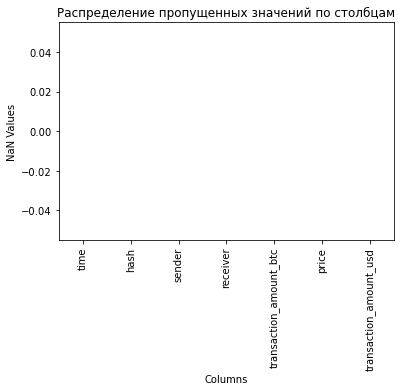

In [10]:
# Оценка качества данных за 2015
verify_data_quality(blt_2015)

Типы данных:
time                       object
hash                       object
sender                     object
receiver                   object
transaction_amount_btc    float64
price                     float64
transaction_amount_usd    float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
306719
__________________________________________________

Дублирующих строк:
77
__________________________________________________

Форма нарбора данных:
(43817, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=43817, step=1)
__________________________________________________



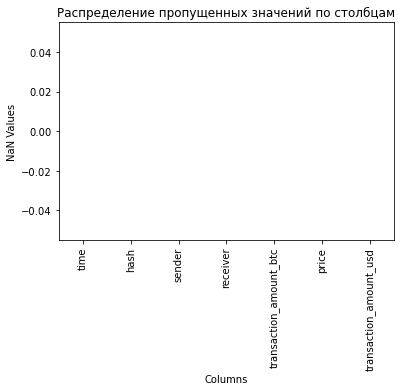

In [11]:
# Оценка качества данных за 2016
verify_data_quality(blt_2016)

Типы данных:
time                       object
hash                       object
sender                     object
receiver                   object
transaction_amount_btc    float64
price                     float64
transaction_amount_usd    float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
69888
__________________________________________________

Дублирующих строк:
310
__________________________________________________

Форма нарбора данных:
(9984, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=9984, step=1)
__________________________________________________



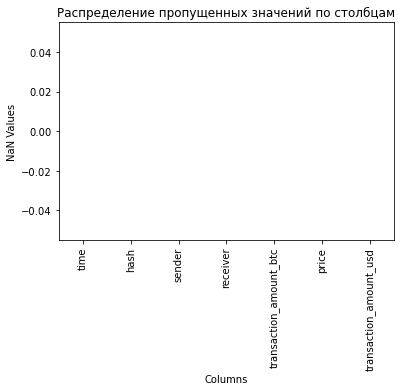

In [12]:
# Оценка качества данных за 2017
verify_data_quality(blt_2017)

### The FinCEN Files

Типы данных:
icij_sar_id           int64
filer_org_name_id    object
filer_org_name       object
entity_b_id          object
entity_b             object
entity_b_country     object
entity_b_iso_code    object
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
38486
__________________________________________________

Дублирующих строк:
14
__________________________________________________

Форма нарбора данных:
(5498, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=5498, step=1)
__________________________________________________



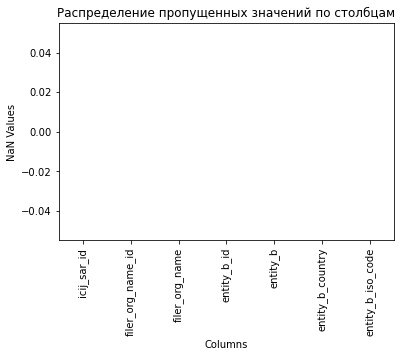

In [13]:
# Оценка качества данных набора Bank connections
verify_data_quality(fc_bc)

Типы данных:
id                            int64
icij_sar_id                   int64
filer_org_name_id            object
filer_org_name               object
begin_date                   object
end_date                     object
originator_bank_id           object
originator_bank              object
originator_bank_country      object
originator_iso               object
beneficiary_bank_id          object
beneficiary_bank             object
beneficiary_bank_country     object
beneficiary_iso              object
number_transactions         float64
amount_transactions         float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
123
__________________________________________________

Количество значений, отличных от NaN:
71989
__________________________________________________

Дублирующих строк:
0
__________________________________________________

Форма нарбора данных:
(4507, 16)
________________________________________________

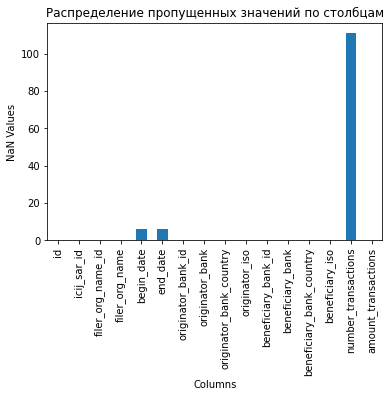

In [14]:
# Оценка качества данных набора Transactions map
verify_data_quality(fc_tm)

### _Data type conversions_

---

### Bitcoin large transactions

Преобразуем тип данных даты и времени для анализа

In [15]:
# Преобразование даты 
blt_2015['time'] = pd.to_datetime(blt_2015['time'])
# Проверка результата
blt_2015.dtypes

time                      datetime64[ns]
hash                              object
sender                            object
receiver                          object
transaction_amount_btc           float64
price                            float64
transaction_amount_usd           float64
dtype: object

In [16]:
# Преобразование даты 
blt_2016['time'] = pd.to_datetime(blt_2016['time'])

# Проверка результата
blt_2016.dtypes

time                      datetime64[ns]
hash                              object
sender                            object
receiver                          object
transaction_amount_btc           float64
price                            float64
transaction_amount_usd           float64
dtype: object

In [17]:
# Преобразование даты 
blt_2017['time'] = pd.to_datetime(blt_2017['time'])

# Проверка результата
blt_2017.dtypes

time                      datetime64[ns]
hash                              object
sender                            object
receiver                          object
transaction_amount_btc           float64
price                            float64
transaction_amount_usd           float64
dtype: object

#### The FinCEN Files

In [18]:
# Преобразование даты 
fc_tm['begin_date'] = pd.to_datetime(fc_tm['begin_date'])

fc_tm['end_date'] = pd.to_datetime(fc_tm['end_date'])

# Проверка результата
fc_tm.dtypes

id                                   int64
icij_sar_id                          int64
filer_org_name_id                   object
filer_org_name                      object
begin_date                  datetime64[ns]
end_date                    datetime64[ns]
originator_bank_id                  object
originator_bank                     object
originator_bank_country             object
originator_iso                      object
beneficiary_bank_id                 object
beneficiary_bank                    object
beneficiary_bank_country            object
beneficiary_iso                     object
number_transactions                float64
amount_transactions                float64
dtype: object

### _Sorting, reordering, reindexing_

---

Объединим наборы данных blt_2015, blt_2016, blt_2017  в один набор blt

Типы данных:
time                      datetime64[ns]
hash                              object
sender                            object
receiver                          object
transaction_amount_btc           float64
price                            float64
transaction_amount_usd           float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
436499
__________________________________________________

Дублирующих строк:
464
__________________________________________________

Форма нарбора данных:
(62357, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=62357, step=1)
__________________________________________________



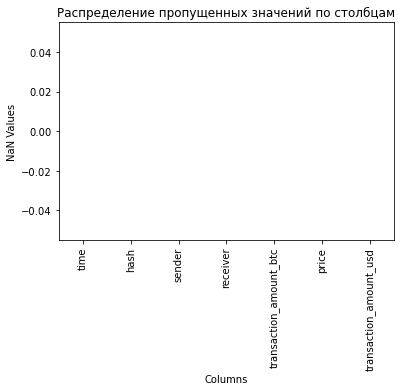

In [19]:
# Объеденение наборов по большит транзакциям биткоин в один 
blt = pd.concat([blt_2015, blt_2016, blt_2017], axis=0, ignore_index=1)

# Проверка результата 
verify_data_quality(blt)

### _Conclusions_

---

В результате предварительной подготовки исходных данных для анализа выполнены следующие действия:
- Сбор и загрузка данных для предварительной подготовки
	- В нашем распоряжении два крупных набора данных одни из которых отражает большие транзакции биткоина в период с 2015 по 2017 годы и представлен тремя файлами в формате csv. 
	- Второй набор отражает данные о банках отправителях и банках получателях в период с 2000-2017 и представлен двумя файлами в формате csv. 
- Каждый из исходного набора данных содержит следующие переменные 
	- Bitcoin large transactions
		- **time** - Дата отправления 
		- **Hash** - Хэш 
		- **Sender** - Отправитель
		- **Receiver** - Получатель
		- **Transaction_amount_BTC** - Сумма транзакции BTC
		- **Price - Цена BTC в USD**
		- **Transaction_amount_USD** - Сумма транзакции USD
	- The FinCEN Files
		- Bank connections
			- **icij_sar_id**  - id подозрительной транзакции 
			- **filer_org_name_id** - Идентификатор регистрационного имя организации 
			- **filer_org_name** - Зарегистрированное имя организации
			- **entity_b_id** - Идентификатор банка 
			- **entity_b** - Название банка
			- **entity_b_country** - Название страны 
			- **entity_b_iso_code**  - Международный код страны
		- Transactions map
			- **id** - Идентификатор 
			- **icij_sar_id** - Идентификатор подозрительной транзакции 
			- **filer_org_name_id** - Идентификатор регистрационного имя организации
			- **filer_org_name** - Зарегистрированное имя организации
			- **begin_date** - Дата начала транзакции
			- **end_date** - Дата завершения транзакции
			- **originator_bank_id** - Идентификатор банка инициатора 
			- **originator_bank** - Название банка инициатора
			- **originator_bank_country** - Название страны банка инициатора
			- **originator_iso** - Международный код страны банка инициатора
			- **beneficiary_bank_id** - Идентификатор банка получателя 
			- **beneficiary_bank** - Название банка получателя
			- **beneficiary_bank_country** - Название страны банка получателя
			- **beneficiary_iso** - Международный код страны банка получателя
			- **number_transactions** - Количество транзакций
			- **amount_transactions** - Сумма транзакций
- Выполнена предварительная оценка качества исходных данных
	- Bitcoin large transactions
		- Пропущенных значений нет 
		- Дублирующих строки 
			- 2015 = 77
			- 2016 = 77
			- 2017 = 310
	- The FinCEN Files
		- Bank connections
			- Пропущенных значений нет
			- Дублирующих строк 14
		- Transactions map
			- Пропущенных значений 123
			- Дублирующих строк нет
- Выполнена конвертация даты из типа  object в тип datetime64[ns]
- Выполнено объедение наборов данных  blt_2015, blt_2016, blt_2017 в один набор blt

#### Сохраниение промежуточны результатов дальнейшего анализа 

In [20]:
# Bitcoin large transactions
pd.DataFrame.to_feather(blt, 'bitcoin_large_transactions_2015_2017_prep.file')

# The FinCEN Files

# Bank connections
pd.DataFrame.to_feather(fc_bc, 'bank_connections_prep.file')

# Transactions map
pd.DataFrame.to_feather(fc_tm, 'transactions_map_prep.file')
